## Import Packages and important Libraries

In [452]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
%matplotlib inline
import re
from ydata_profiling import ProfileReport
import missingno as msno

## 1- Data UnderStanding = EDA

In [453]:
df = pd.read_csv('sales_data.csv')
df

,Order Date,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [454]:
df.columns = [x.replace(' ', '_') for x in df.columns]
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [455]:
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [456]:
df.head(10)

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,1/29/2019 20:22,141239,AAA Batteries (4-pack),2.950000e+12,Accessories,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
6,1/26/2019 12:16,141240,27in 4K Gaming Monitor,5.170000e+12,Appliances,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,NaN,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,1/1/2019 10:30,141242,Bose SoundSport Headphones,1.510000e+12,Accessories,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,1/22/2019 21:20,141243,Apple Airpods Headphones,1.390000e+12,Accessories,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185966 entries, 0 to 185965
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_Date        185966 non-null  object 
 1   Order_ID          185966 non-null  int64  
 2   Product           185966 non-null  object 
 3   Product_ean       185966 non-null  float64
 4   Category          185366 non-null  object 
 5   Purchase_Address  185966 non-null  object 
 6   Quantity_Ordered  185966 non-null  int64  
 7   Price_Each        185734 non-null  float64
 8   Cost_price        185966 non-null  float64
 9   turnover          185966 non-null  float64
 10  margin            185966 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


________________________________

## 2- Data PreProcessing

1-Nulls

In [458]:
total_nulls = df.isnull().sum()
percent_nulls = (total_nulls/df.isnull().count()*100)

nulls_in_data = pd.DataFrame({'Total_Nulls':total_nulls, '% nulls':percent_nulls})
nulls_in_data.sort_values(by='Total_Nulls', ascending=False)

,Total_Nulls,% nulls
Category,600,0.322640
Price_Each,232,0.124754
Order_Date,0,0.000000
Order_ID,0,0.000000
Product,0,0.000000
Product_ean,0,0.000000
Purchase_Address,0,0.000000
Quantity_Ordered,0,0.000000
Cost_price,0,0.000000
turnover,0,0.000000


1-Category column countain 32% (Nulls)


2-Price Each column countain 12% (Nulls)

2- MissingNo

<AxesSubplot:>

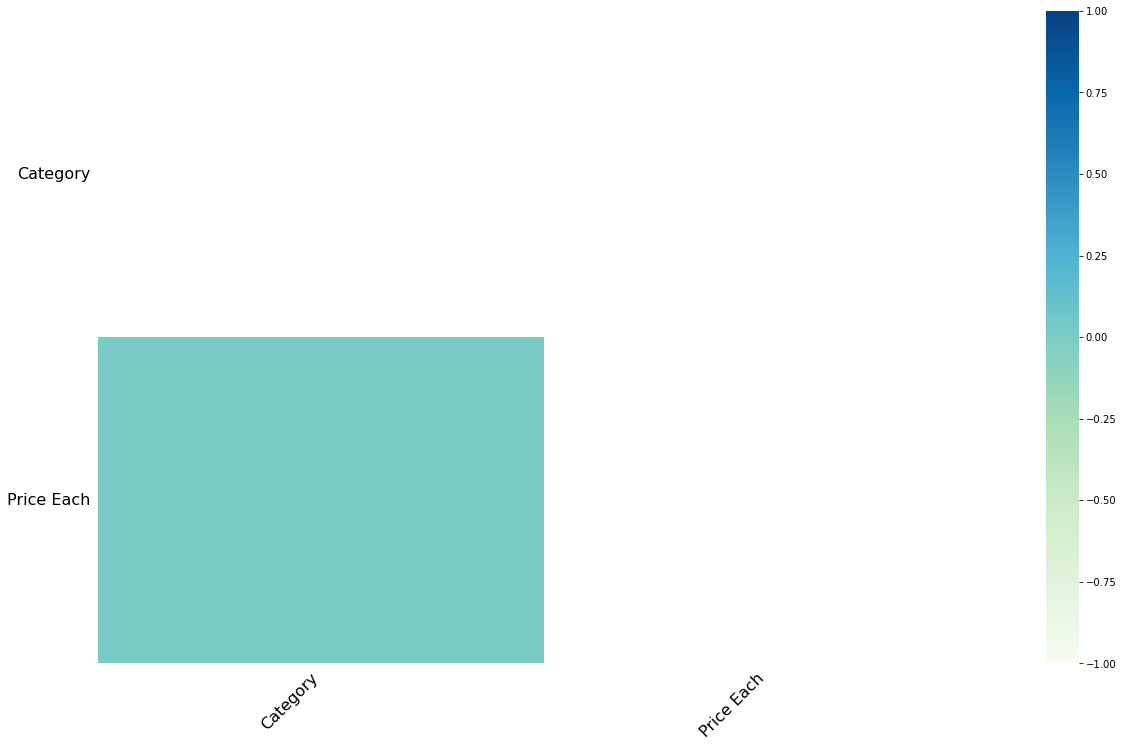

In [516]:
msno.heatmap(df1,cmap='GnBu')

<AxesSubplot:>

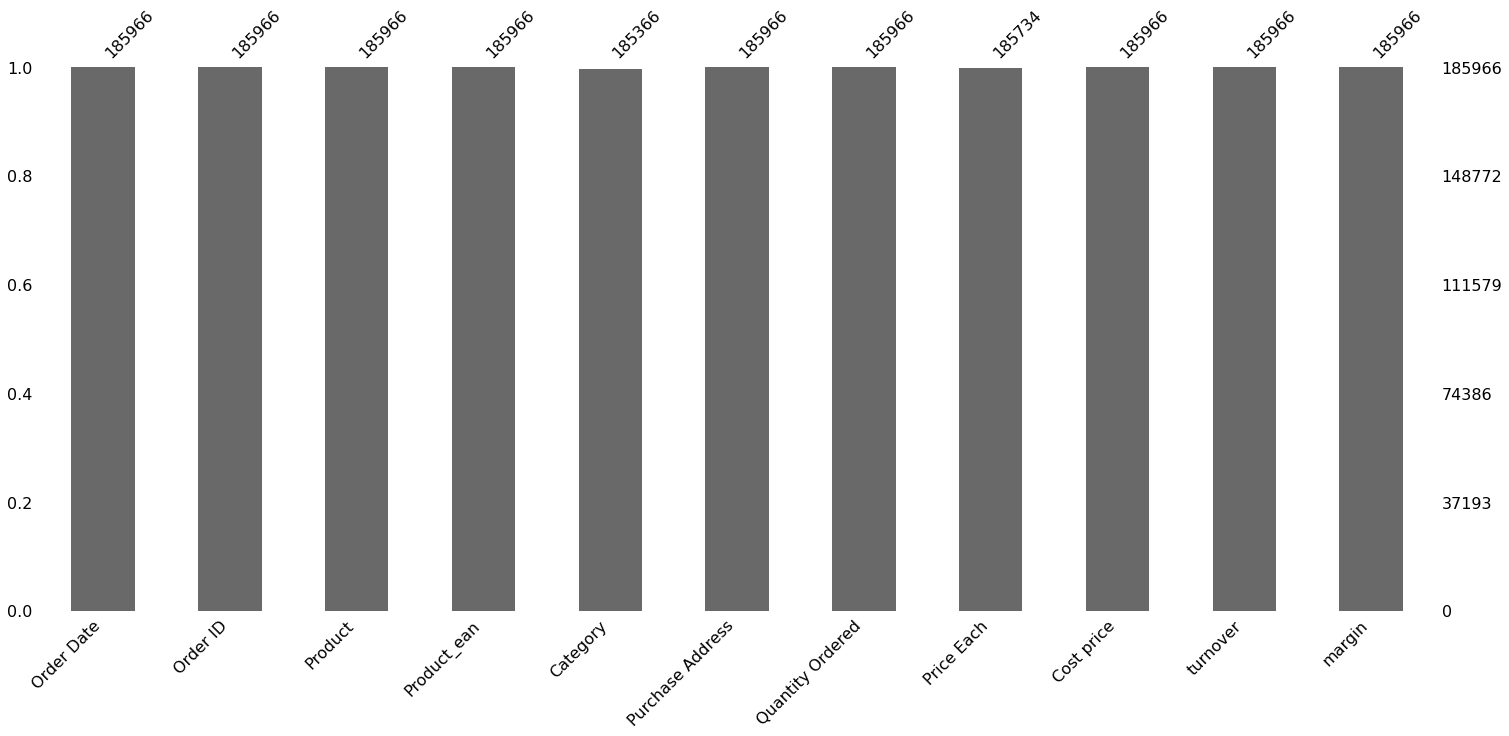

In [517]:
msno.bar(df1)

detect nulls

In [461]:
category_null = df[df['Category'].isnull()]
category_null

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,NaN,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
7,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,NaN,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
14,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,NaN,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
22,1/5/2019 17:20,141249,27in FHD Monitor,9.640000e+12,NaN,"440 Cedar St, Portland, OR 97035",1,149.99,97.4935,149.99,52.4965
55,1/5/2019 16:51,141281,Lightning Charging Cable,8.250000e+12,NaN,"274 2nd St, Atlanta, GA 30301",1,14.95,7.4750,14.95,7.4750
...,...,...,...,...,...,...,...,...,...,...,...
9601,1/5/2019 20:36,150416,USB-C Charging Cable,8.270000e+12,NaN,"887 Hickory St, Atlanta, GA 30301",1,11.95,5.9750,11.95,5.9750
9646,1/6/2019 0:46,150460,34in Ultrawide Monitor,2.200000e+12,NaN,"803 14th St, New York City, NY 10001",1,379.99,125.3967,379.99,254.5933
9650,1/5/2019 11:24,150464,AA Batteries (4-pack),7.820000e+12,NaN,"814 West St, Seattle, WA 98101",1,3.84,1.9200,3.84,1.9200
9653,1/5/2019 15:48,150467,Wired Headphones,6.310000e+12,NaN,"398 Wilson St, Portland, OR 97035",1,11.99,5.9950,11.99,5.9950


In [462]:
category_null['Product'].value_counts(normalize=True)

AAA Batteries (4-pack)        0.123333
Lightning Charging Cable      0.118333
USB-C Charging Cable          0.116667
Wired Headphones              0.113333
AA Batteries (4-pack)         0.108333
Apple Airpods Headphones      0.081667
Bose SoundSport Headphones    0.073333
27in FHD Monitor              0.046667
Google Phone                  0.041667
27in 4K Gaming Monitor        0.035000
iPhone                        0.031667
ThinkPad Laptop               0.023333
34in Ultrawide Monitor        0.021667
20in Monitor                  0.018333
Flatscreen TV                 0.016667
Macbook Pro Laptop            0.015000
Vareebadd Phone               0.006667
LG Dryer                      0.005000
LG Washing Machine            0.003333
Name: Product, dtype: float64

In [463]:
df['Category'].fillna('Accessories',inplace=True)

In [464]:
df['Category'].isnull().sum()

0

In [465]:
price_each_null = df[df['Price_Each'].isnull()]
price_each_null

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
149,1/20/2019 13:08,141373,27in FHD Monitor,6.960000e+12,Appliances,"82 Hickory St, San Francisco, CA 94016",1,NaN,97.4935,149.99,52.4965
187,1/3/2019 22:02,141410,27in FHD Monitor,9.850000e+12,Appliances,"890 6th St, Dallas, TX 75001",1,NaN,97.4935,149.99,52.4965
270,1/24/2019 9:54,141490,27in FHD Monitor,6.250000e+12,Appliances,"201 Center St, New York City, NY 10001",1,NaN,97.4935,149.99,52.4965
302,1/2/2019 23:35,141522,27in FHD Monitor,5.210000e+12,Appliances,"240 Maple St, Dallas, TX 75001",1,NaN,97.4935,149.99,52.4965
318,1/12/2019 15:38,141538,27in FHD Monitor,7.800000e+12,Appliances,"765 River St, New York City, NY 10001",1,NaN,97.4935,149.99,52.4965
...,...,...,...,...,...,...,...,...,...,...,...
51952,4/13/2019 22:15,191060,LG Dryer,7.740000e+12,Appliances,"869 Chestnut St, Boston, MA 02215",1,NaN,198.0000,600.00,402.0000
52005,4/15/2019 20:08,191112,LG Dryer,4.290000e+12,Appliances,"252 4th St, Atlanta, GA 30301",1,NaN,198.0000,600.00,402.0000
52733,4/1/2019 10:57,191809,LG Dryer,5.710000e+12,Appliances,"986 Ridge St, San Francisco, CA 94016",1,NaN,198.0000,600.00,402.0000
52989,4/2/2019 22:49,192052,LG Dryer,3.440000e+12,Appliances,"455 West St, Atlanta, GA 30301",1,NaN,198.0000,600.00,402.0000


In [466]:
price_each_null['Product'].value_counts(normalize=True)

LG Dryer            0.724138
27in FHD Monitor    0.275862
Name: Product, dtype: float64

In [467]:
median_price_each_LG = df[df['Product'].str.contains('LG Dryer')]['Price_Each'].median()
median_price_each_27in_FHD_Monitor = df[df['Product'].str.contains('27in FHD Monitor')]['Price_Each'].median()

In [468]:
df.loc[df['Product'].str.contains('LG Dryer'), 'Price_Each'] = df[df['Product'].str.contains('LG Dryer')]['Price_Each'].fillna(median_price_each_LG)
df.loc[df['Product'].str.contains('27in FHD Monitor'), 'Price_Each'] = df[df['Product'].str.contains('27in FHD Monitor')]['Price_Each'].fillna(median_price_each_27in_FHD_Monitor)

In [469]:
df['Price_Each'].isnull().sum()

0

In [470]:
df[df['Price_Each'].isnull()]

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin


In [471]:
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


In [472]:
# profile = ProfileReport(df)
# profile

3-duplicates

In [473]:
df[df.duplicated(keep=False, subset='Order_ID')]

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
6,1/26/2019 12:16,141240,27in 4K Gaming Monitor,5.170000e+12,Appliances,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,1/1/2019 10:30,141242,Bose SoundSport Headphones,1.510000e+12,Accessories,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,1/22/2019 21:20,141243,Apple Airpods Headphones,1.390000e+12,Accessories,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
10,1/7/2019 11:29,141244,Apple Airpods Headphones,4.330000e+12,Accessories,"492 Walnut St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
...,...,...,...,...,...,...,...,...,...,...,...
185877,12/11/2019 0:30,319584,Wired Headphones,8.270000e+12,Accessories,"537 Sunset St, Portland, OR 97035",1,11.99,5.9950,11.99,5.9950
185889,12/1/2019 8:44,319596,iPhone,4.250000e+12,Phones,"436 14th St, New York City, NY 10001",1,700.00,231.0000,700.00,469.0000
185890,12/1/2019 8:44,319596,Lightning Charging Cable,7.830000e+12,Accessories,"436 14th St, New York City, NY 10001",1,14.95,7.4750,14.95,7.4750
185925,12/17/2019 22:35,319631,34in Ultrawide Monitor,2.020000e+12,Appliances,"363 Highland St, Austin, TX 73301",1,379.99,125.3967,379.99,254.5933


In [474]:
duplicated_order_id = df[df.duplicated(keep=False, subset='Order_ID')]
duplicated_order_id

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
6,1/26/2019 12:16,141240,27in 4K Gaming Monitor,5.170000e+12,Appliances,"979 Park St, Los Angeles, CA 90001",1,389.99,128.6967,389.99,261.2933
7,1/5/2019 12:04,141241,USB-C Charging Cable,8.050000e+12,Accessories,"181 6th St, San Francisco, CA 94016",1,11.95,5.9750,11.95,5.9750
8,1/1/2019 10:30,141242,Bose SoundSport Headphones,1.510000e+12,Accessories,"867 Willow St, Los Angeles, CA 90001",1,99.99,49.9950,99.99,49.9950
9,1/22/2019 21:20,141243,Apple Airpods Headphones,1.390000e+12,Accessories,"657 Johnson St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
10,1/7/2019 11:29,141244,Apple Airpods Headphones,4.330000e+12,Accessories,"492 Walnut St, San Francisco, CA 94016",1,150.00,97.5000,150.00,52.5000
...,...,...,...,...,...,...,...,...,...,...,...
185877,12/11/2019 0:30,319584,Wired Headphones,8.270000e+12,Accessories,"537 Sunset St, Portland, OR 97035",1,11.99,5.9950,11.99,5.9950
185889,12/1/2019 8:44,319596,iPhone,4.250000e+12,Phones,"436 14th St, New York City, NY 10001",1,700.00,231.0000,700.00,469.0000
185890,12/1/2019 8:44,319596,Lightning Charging Cable,7.830000e+12,Accessories,"436 14th St, New York City, NY 10001",1,14.95,7.4750,14.95,7.4750
185925,12/17/2019 22:35,319631,34in Ultrawide Monitor,2.020000e+12,Appliances,"363 Highland St, Austin, TX 73301",1,379.99,125.3967,379.99,254.5933


In [475]:
duplicated_order_id.to_csv('drop_duplicates_order_id.csv')

In [476]:
duplicated_order_id = df.drop_duplicates(keep='first', subset='Order_ID', inplace=True)

In [477]:
df[df.duplicated(keep=False)].shape

(0, 11)

In [478]:
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,1/22/2019 21:25,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,1/28/2019 14:15,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,1/17/2019 13:33,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,1/5/2019 20:33,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,1/25/2019 11:59,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,12/11/2019 20:58,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,12/1/2019 12:01,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,12/9/2019 6:43,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,12/3/2019 10:39,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


4 - Convert Types

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178437 entries, 0 to 185965
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order_Date        178437 non-null  object 
 1   Order_ID          178437 non-null  int64  
 2   Product           178437 non-null  object 
 3   Product_ean       178437 non-null  float64
 4   Category          178437 non-null  object 
 5   Purchase_Address  178437 non-null  object 
 6   Quantity_Ordered  178437 non-null  int64  
 7   Price_Each        178437 non-null  float64
 8   Cost_price        178437 non-null  float64
 9   turnover          178437 non-null  float64
 10  margin            178437 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 16.3+ MB


In [480]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [481]:
df['Product'] = df['Product'].astype('string')

In [482]:
df['Category'] = df['Category'].astype('string')

In [483]:
df['Purchase_Address'] = df['Purchase_Address'].astype('string')

In [484]:
print(df.dtypes)

Order_Date          datetime64[ns]
Order_ID                     int64
Product                     string
Product_ean                float64
Category                    string
Purchase_Address            string
Quantity_Ordered             int64
Price_Each                 float64
Cost_price                 float64
turnover                   float64
margin                     float64
dtype: object


5 - Out Liers

In [485]:
df.describe()

,Order_ID,Product_ean,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
count,178437.000000,1.784370e+05,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000
mean,230452.000000,5.508964e+12,1.125596,187.611323,70.759941,188.703013,117.410893
std,51510.469329,2.597587e+12,0.445198,335.317522,110.206770,335.513390,227.034465
min,141234.000000,1.000000e+12,1.000000,2.990000,1.495000,2.990000,1.495000
25%,185843.000000,3.260000e+12,1.000000,11.950000,5.975000,11.950000,5.975000
50%,230452.000000,5.510000e+12,1.000000,14.950000,7.475000,14.950000,7.475000
75%,275061.000000,7.760000e+12,1.000000,150.000000,97.500000,150.000000,52.500000
max,319670.000000,1.000000e+13,9.000000,1700.000000,561.000000,3400.000000,2278.000000


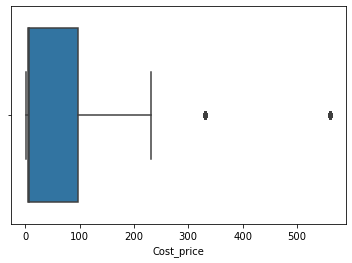

In [486]:
sns.boxplot(x='Cost_price', data=df)
plt.show()

In [487]:
q1 = df['Cost_price'].quantile(0.25)
q3 = df['Cost_price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_no_outliers = df[(df['Cost_price'] >= lower_bound) & (df['Cost_price'] <= upper_bound)]

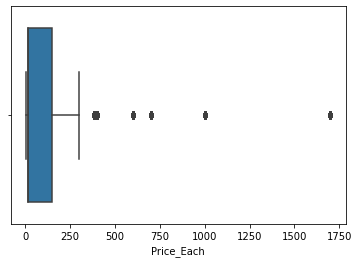

In [488]:
sns.boxplot(x='Price_Each', data=df)
plt.show()

In [489]:
q2 = df['Price_Each'].quantile(0.25)
q4 = df['Price_Each'].quantile(0.75)
iqr2 = q4 - q2

lower_bound = q2 - 1.5 * iqr2
upper_bound = q4 + 1.5 * iqr2
df_no_outliers = df[(df['Price_Each'] >= lower_bound) & (df['Price_Each'] <= upper_bound)]

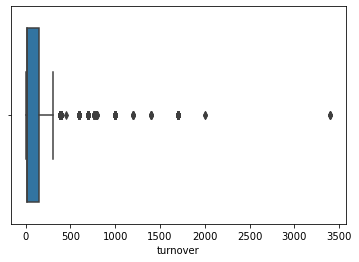

In [490]:
sns.boxplot(x='turnover', data=df)
plt.show()

In [491]:
q3 = df['turnover'].quantile(0.25)
q5 = df['turnover'].quantile(0.75)
iqr3 = q5 - q3

lower_bound = q3 - 1.5 * iqr3
upper_bound = q5 + 1.5 * iqr3
df_no_outliers = df[(df['turnover'] >= lower_bound) & (df['turnover'] <= upper_bound)]

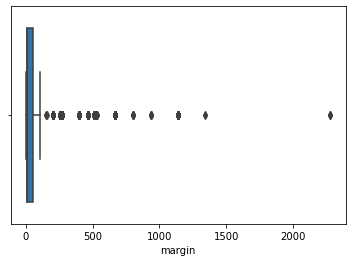

In [492]:
sns.boxplot(x='margin', data=df)
plt.show()

In [493]:
q4 = df['margin'].quantile(0.25)
q6 = df['margin'].quantile(0.75)
iqr4 = q6 - q4

lower_bound = q4 - 1.5 * iqr4
upper_bound = q6 + 1.5 * iqr4
df_no_outliers = df[(df['margin'] >= lower_bound) & (df['margin'] <= upper_bound)]

In [494]:
df_no_outliers

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
5,2019-01-29 20:22:00,141239,AAA Batteries (4-pack),2.950000e+12,Accessories,"775 Willow St, San Francisco, CA 94016",1,2.99,1.4950,2.99,1.4950
...,...,...,...,...,...,...,...,...,...,...,...
185957,2019-12-31 19:07:00,319662,Bose SoundSport Headphones,1.840000e+12,Accessories,"939 8th St, San Francisco, CA 94016",1,99.99,49.9950,99.99,49.9950
185961,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185964,2019-12-03 10:39:00,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


6- Regex

In [512]:
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,Month,Day_Name
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,1,Tuesday
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,1,Monday
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,1,Thursday
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,1,Saturday
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,1,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185961,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750,12,Wednesday
185962,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400,12,Sunday
185963,2019-12-09 06:43:00,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000,12,Monday
185964,2019-12-03 10:39:00,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950,12,Tuesday


In [513]:
column_data = df['Purchase_Address']
print("Column Data:\n", column_data)

Column Data:
 0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
185961    14 Madison St, San Francisco, CA 94016
185962      549 Willow St, Los Angeles, CA 90001
185963          273 Wilson St, Seattle, WA 98101
185964            778 River St, Dallas, TX 75001
185965    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase_Address, Length: 178437, dtype: string


* extract new columns contain City

In [514]:
import pandas as pd

data = {'Purchase_Address': ['185 Maple St, Portland, OR 97035', 
                             '538 Adams St, San Francisco, CA 94016',
                               '738 10th St, Los Angeles, CA 90001' ,
                               '387 10th St, Austin, TX 73301', 
                               '14 Madison St, San Francisco, CA 94016',
                                 '549 Willow St, Los Angeles, CA 90001',
                                 '273 Wilson St, Seattle, WA 98101', 
                                 '778 River St, Dallas, TX 75001',
                                   '747 Chestnut St, Los Angeles,CA 90001']}
df1 = pd.DataFrame(data)

city_pattern = r',\s*([A-Za-z\s]+),\s*[A-Z]{2}\s*\d{5}'

df['City'] = 'city_pattern'

df['City'] = df['Purchase_Address'].str.extract(city_pattern)

df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,Month,Day_Name,City
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,1,Tuesday,Boston
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,1,Monday,Portland
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,1,Thursday,San Francisco
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,1,Saturday,Los Angeles
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,1,Friday,Austin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185961,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750,12,Wednesday,San Francisco
185962,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400,12,Sunday,Los Angeles
185963,2019-12-09 06:43:00,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000,12,Monday,Seattle
185964,2019-12-03 10:39:00,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950,12,Tuesday,Dallas


____________________________________

## 3- Visualization and Analysiz

In [495]:
df

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185961,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.550000e+12,Accessories,"14 Madison St, San Francisco, CA 94016",1,14.95,7.4750,14.95,7.4750
185962,2019-12-01 12:01:00,319667,AA Batteries (4-pack),5.350000e+12,Accessories,"549 Willow St, Los Angeles, CA 90001",2,3.84,1.9200,7.68,3.8400
185963,2019-12-09 06:43:00,319668,Vareebadd Phone,2.670000e+12,Accessories,"273 Wilson St, Seattle, WA 98101",1,400.00,132.0000,400.00,268.0000
185964,2019-12-03 10:39:00,319669,Wired Headphones,5.220000e+12,Accessories,"778 River St, Dallas, TX 75001",1,11.99,5.9950,11.99,5.9950


1- Piechart (analysis relationship between categories and products)

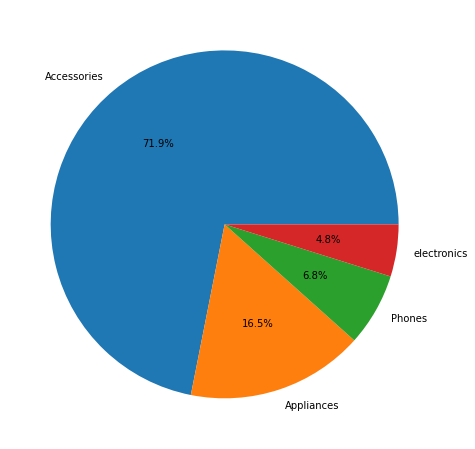

In [496]:
plt.figure(figsize=(10, 8))
categories_products = df.groupby('Category')['Product'].count()
plt.pie(categories_products, labels=categories_products.index, autopct='%1.1f%%')
plt.show()

(Accessories are the most cateogry in shop)

(eletoronics are the least category in shop)

2 -Most Category orderd by PieChart

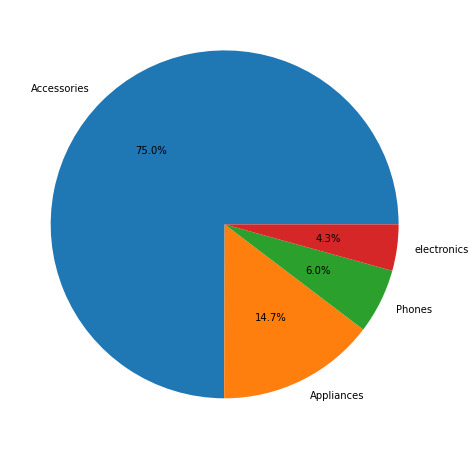

In [497]:
plt.figure(figsize=(10, 8))
most_orderd = df.groupby('Category')['Quantity_Ordered'].sum()
plt.pie(most_orderd, labels=most_orderd.index, autopct='%1.1f%%')
plt.show()

(Accessories are the most Categories orderd in shop)

(electronics are the least Categories orderd in shop)

3- most product was orderd by PieChart

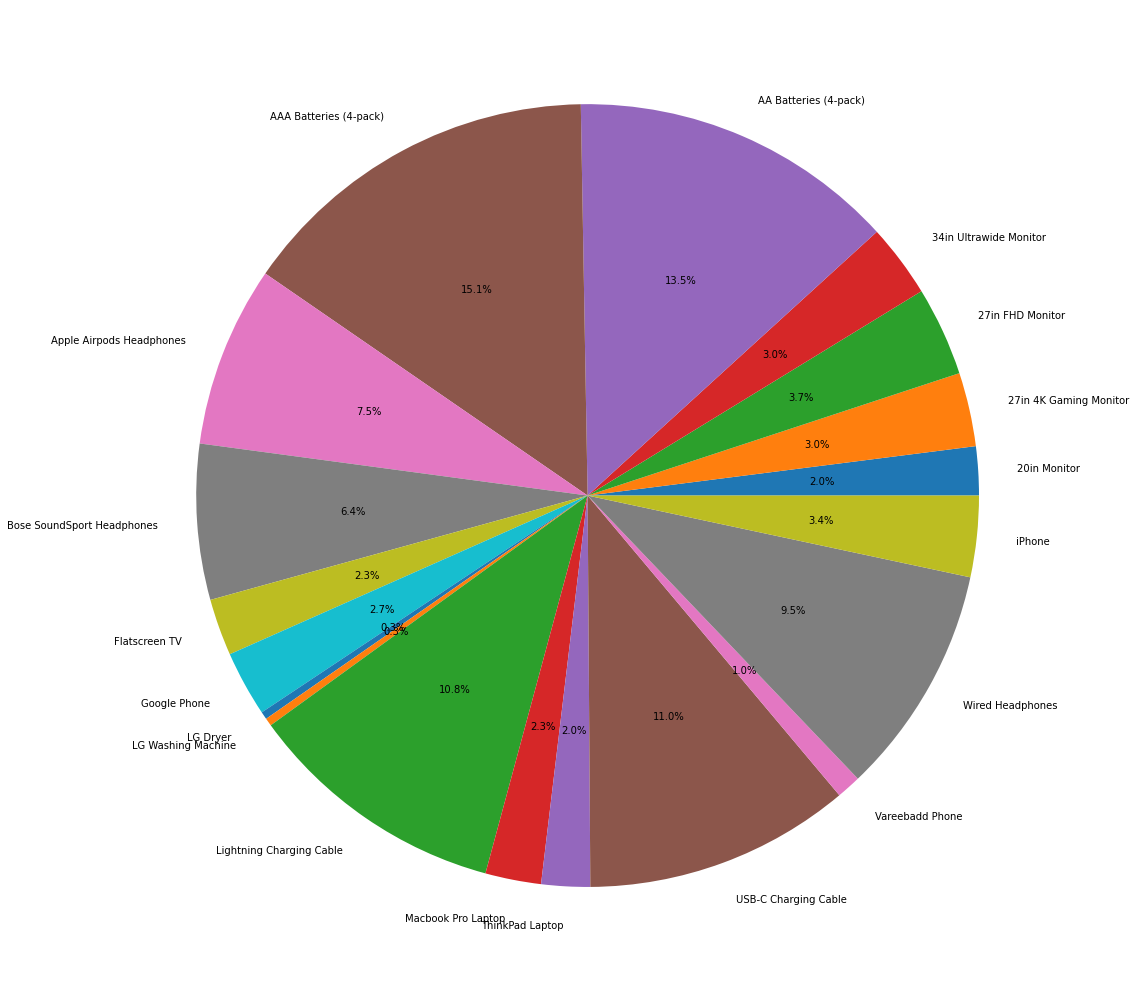

In [498]:
plt.figure(figsize=(20, 18))
most_orderd = df.groupby('Product')['Quantity_Ordered'].sum()
plt.pie(most_orderd, labels=most_orderd.index, autopct='%1.1f%%')
plt.show()

(AAA Batteries) the most product was orderd 

4- Most Order date by Month by CountPlot

In [499]:
df.head()

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


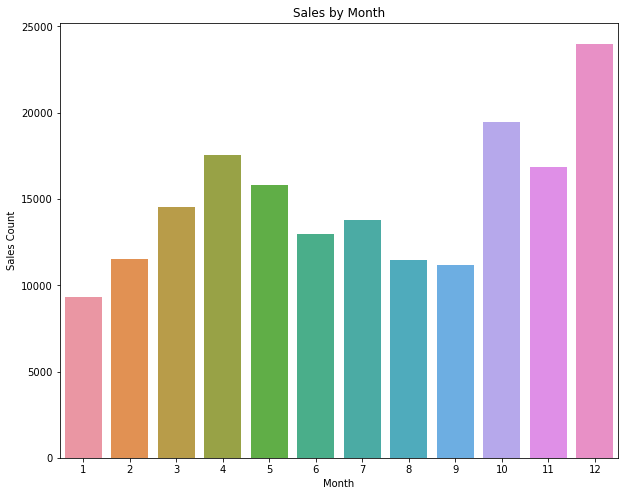

In [500]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Month'] = df['Order_Date'].dt.month

plt.figure(figsize=(10, 8))
sns.countplot(x='Month', data=df)
plt.xlabel('Month') 
plt.ylabel('Sales Count') 
plt.title('Sales by Month') 
plt.show()

(The Most Month Sales Was (December))

5- Analysis by correlation

<function matplotlib.pyplot.show(close=None, block=None)>

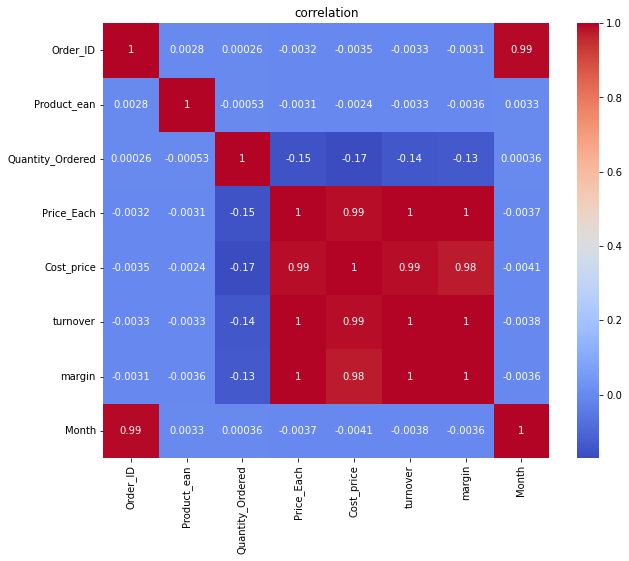

In [501]:
correlation =  df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('correlation')
plt.show

(when the cost_price was increase the price_each increased also because they have an expulsion relationship)

6- The most sales by day by LinePlot

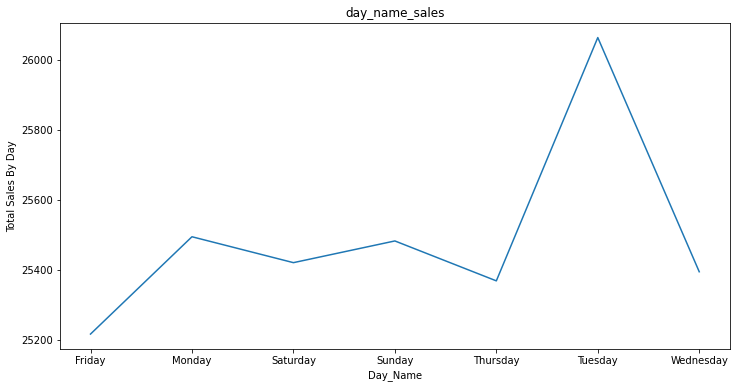

In [502]:
df['Day_Name'] = df['Order_Date'].dt.day_name()
day_name_sales = df.groupby('Day_Name')['turnover'].count()

day_name_sales.plot(kind='line', figsize=(12, 6))
plt.xlabel('Day_Name') 
plt.ylabel('Total Sales By Day') 
plt.title('day_name_sales') 
plt.show()

(The Most Day sales was (Tuesday))

(The Least Day sales was (Friday)) i think its logical because this day is holiday 

In [503]:
df.head()

,Order_Date,Order_ID,Product,Product_ean,Category,Purchase_Address,Quantity_Ordered,Price_Each,Cost_price,turnover,margin,Month,Day_Name
0,2019-01-22 21:25:00,141234,iPhone,5.640000e+12,Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,1,Tuesday
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.560000e+12,Accessories,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,1,Monday
2,2019-01-17 13:33:00,141236,Wired Headphones,2.110000e+12,Accessories,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,1,Thursday
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.070000e+12,Accessories,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,1,Saturday
4,2019-01-25 11:59:00,141238,Wired Headphones,9.690000e+12,Accessories,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,1,Friday


7- check total category sales by BarChart

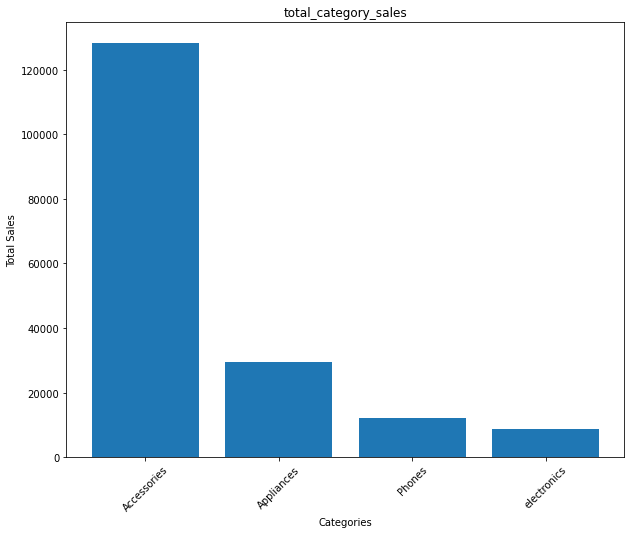

In [504]:
plt.figure(figsize=(10, 8))
category_sales = df.groupby('Category')['turnover'].count()

plt.bar(category_sales.index, category_sales.values) 

plt.xticks(rotation=45) 
plt.xlabel('Categories') 
plt.ylabel('Total Sales') 
plt.title('total_category_sales') 
plt.show()

Accessoris are the top Sales 

8- What is the most product was sold

In [505]:
df['Product'].max()

'iPhone'

9- What is the least product was sold

In [506]:
df['Product'].min()

'20in Monitor'

10- What is the most Quantity_Ordered 

In [507]:
df['Quantity_Ordered'].max()

9

_______________________________

## FINISHED